In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing_data=pd.read_excel("/content/3873757-housing.xlsx")
housing_data.head()
#showing top 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
# Bottom 5 rows
housing_data.tail()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [ ]:
housing_data.shape

(20640, 10)

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
 #replace null value with 0
 housing_data.fillna(0, inplace=True)

In [ ]:
#checking for null value now
housing_data.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY

















# **VISUALIZATION**

## **Location of the house**
* According to latitude and longitude
* Circular marker represent the population density greater the marker more the density
* The colour gradient represent the housing value, violet to yellow ,prices increase.

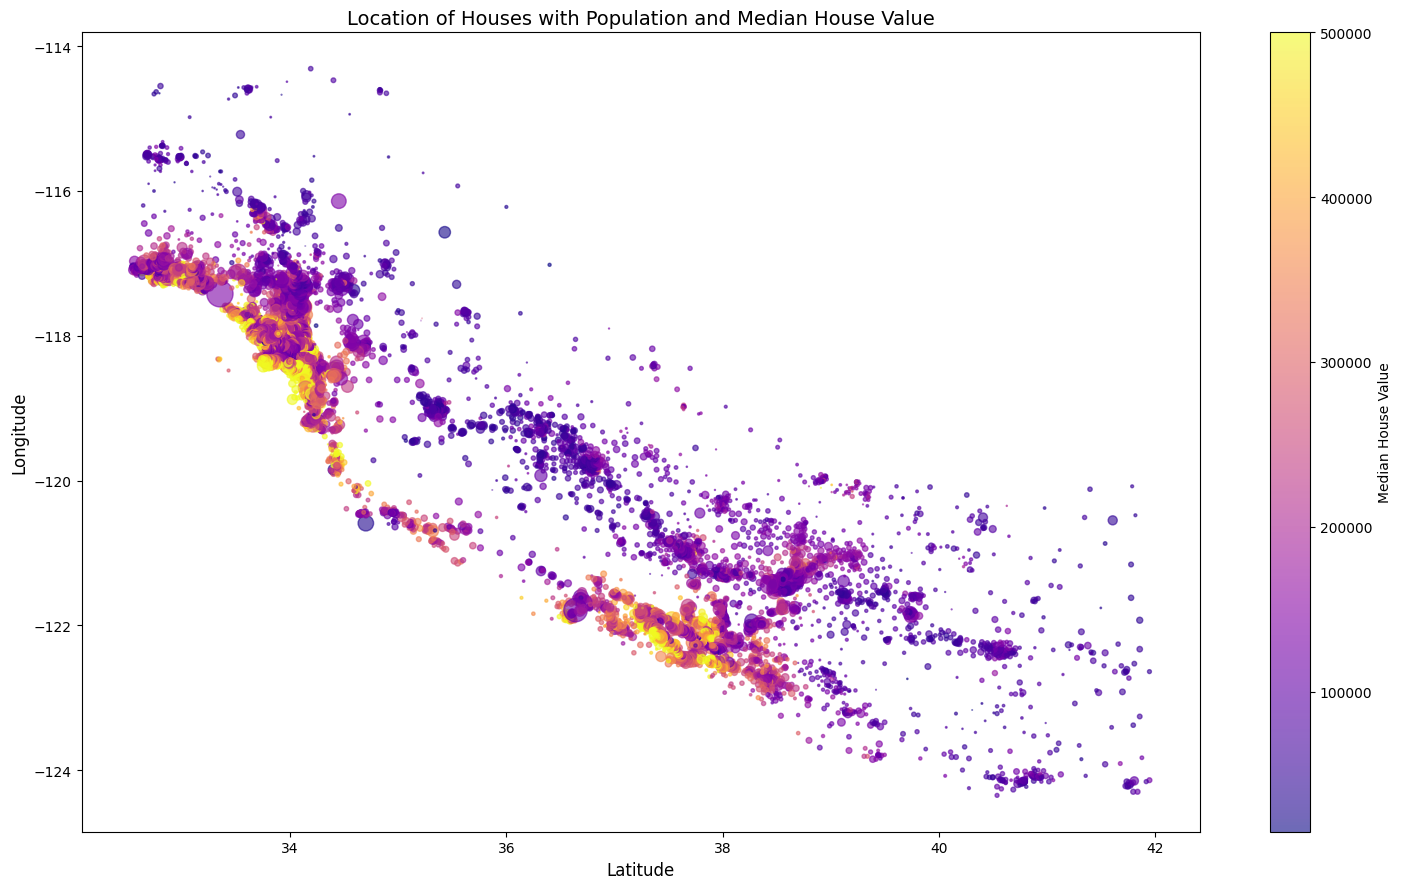

In [ ]:
# location of house
plt.figure(figsize=(15, 9))  # Adjust figure size for better visualization
plt.scatter(housing_data.latitude, housing_data.longitude, marker='o',
            s=housing_data.population/100,# size of each marker based on population
            alpha=0.6,# Transperancy to the marker understand the density of houses in certain area
            c=housing_data.median_house_value, cmap='plasma') # color-coding to the markers based on the 'median_house_value
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.title("Location of Houses with Population and Median House Value", fontsize=14)
plt.colorbar(label="Median House Value")  # Add a colorbar to represent house values
plt.tight_layout()
plt.show()

## **Houses count according to Ocean proximity**

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


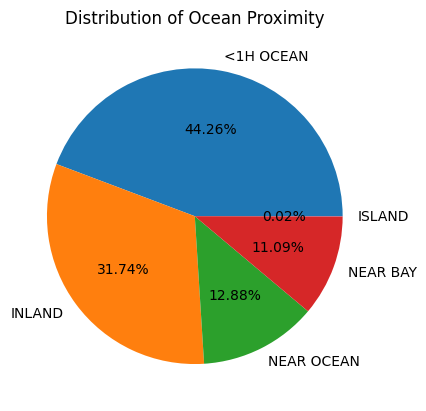

In [ ]:
# Assuming 'housing_data' and 'ocean_proximity' are defined
ocean_proximity_counts = housing_data['ocean_proximity'].value_counts()
print(ocean_proximity_counts)

# Create a pie chart using matplotlib
plt.pie(ocean_proximity_counts, labels=ocean_proximity_counts.index,
        autopct='%1.2f%%')# % format specifier,1:=width :1=no.s after the decimal point
                          # f = floating % symbol
plt.title("Distribution of Ocean Proximity")
plt.show()

## **Average house value according to ocean proximity**

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64


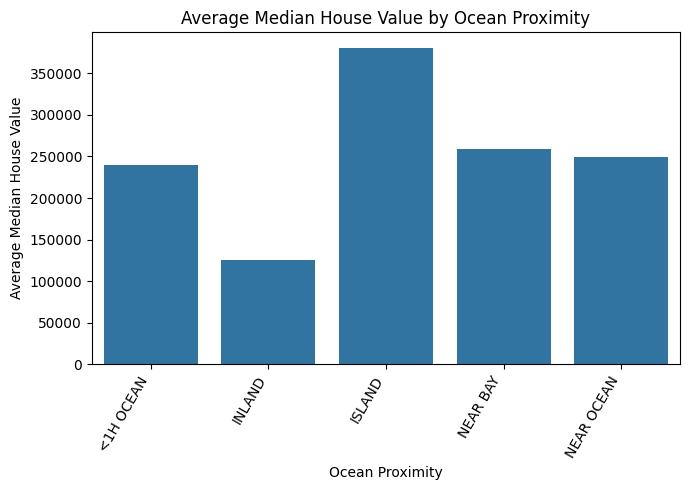

In [ ]:
# Calculate the average median house value for each ocean proximity category
average_median_house_value_by_ocean_proximity = housing_data.groupby('ocean_proximity')['median_house_value'].mean()
print(average_median_house_value_by_ocean_proximity)

# Create a bar plot using Seaborn
plt.figure(figsize=(7, 5))  # Adjust figure size if needed
sns.barplot(x=average_median_house_value_by_ocean_proximity.index,
            y=average_median_house_value_by_ocean_proximity.values)
plt.xlabel("Ocean Proximity")
plt.ylabel("Average Median House Value")
plt.title("Average Median House Value by Ocean Proximity")
plt.xticks(rotation=60, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## **Count of house according to the ages**

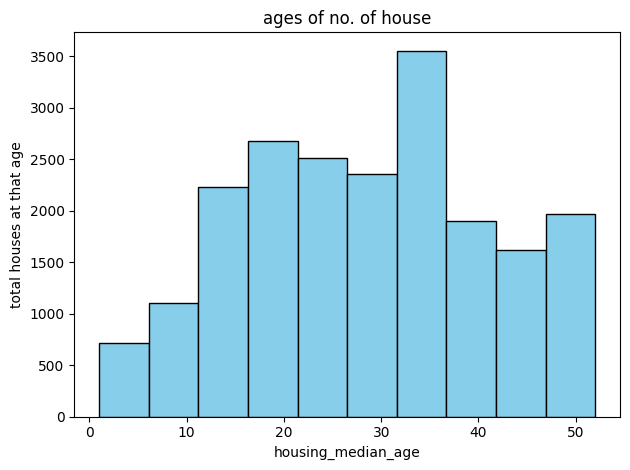

In [ ]:
# total no of house in perticular ages
plt.hist(housing_data.housing_median_age,edgecolor ='black',color='skyblue')
plt.xlabel("housing_median_age")
plt.ylabel("total houses at that age")
plt.title("ages of no. of house")
plt.tight_layout()
plt.show()

## **Average house age according to the ocean proximity**

ocean_proximity
<1H OCEAN     29.279225
INLAND        24.271867
ISLAND        42.400000
NEAR BAY      37.730131
NEAR OCEAN    29.347254
Name: housing_median_age, dtype: float64


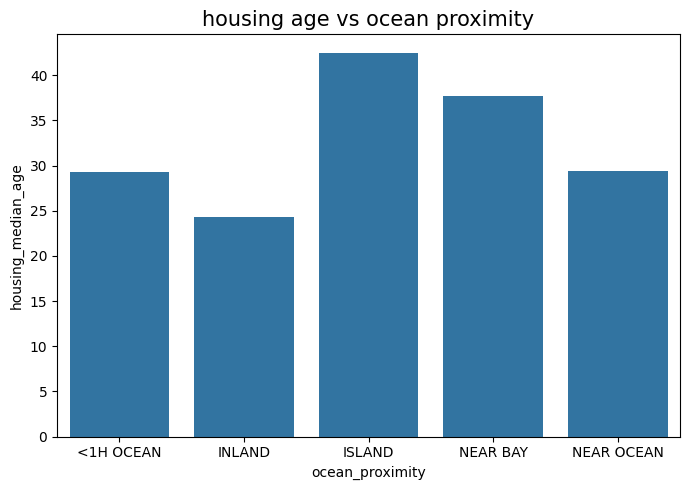

In [ ]:
n=housing_data.groupby('ocean_proximity')['housing_median_age'].mean()
print(n)

plt.figure(figsize=(7, 5))
sns.barplot(x=n.index,
            y=n.values)
plt.xlabel('ocean_proximity')
plt.ylabel('housing_median_age')
plt.title('housing age vs ocean proximity',fontsize=15)
plt.tight_layout()
plt.show()



## **Average house value according to the age of the house**

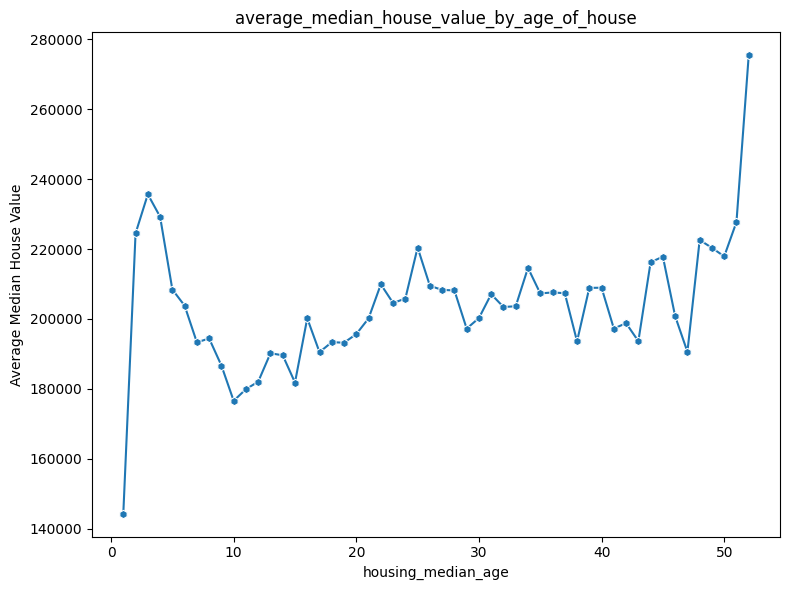

In [ ]:
#Average house value according to the age of the house

average_median_house_value_by_age_of_house = housing_data.groupby('housing_median_age')['median_house_value'].mean()
# print(average_median_house_value_by_age_of_house)

plt.figure(figsize=(8,6))  # Adjust figure size if needed

sns.lineplot(x=average_median_house_value_by_age_of_house.index,
             y=average_median_house_value_by_age_of_house.values,
             marker='h')
plt.xlabel("housing_median_age")
plt.ylabel("Average Median House Value")
plt.title("average_median_house_value_by_age_of_house")
plt.tight_layout()
plt.show()


# **Age of house on perticular location with is value**

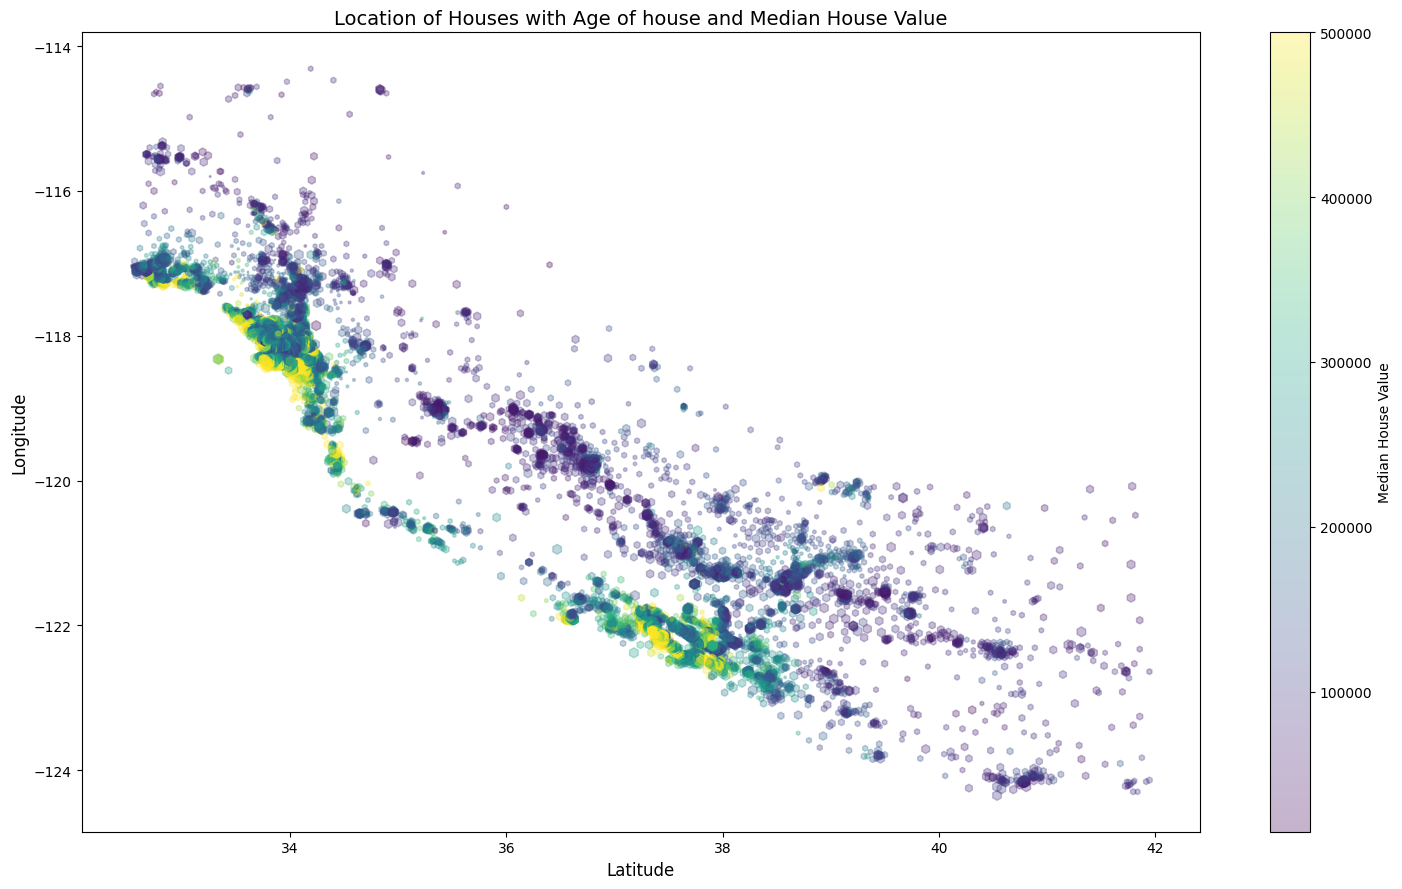

In [ ]:
# location of house
plt.figure(figsize=(15, 9))  # Adjust figure size for better visualization
plt.scatter(housing_data.latitude, housing_data.longitude, marker='h',
            s=housing_data.housing_median_age,# size of each marker based on age of house
            alpha=0.3,# Transperancy to the marker understand the age of houses in certain area
            c=housing_data.median_house_value, cmap='viridis') # color-coding to the markers based on the 'median_house_value
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.title("Location of Houses with Age of house and Median House Value", fontsize=14)
plt.colorbar(label="Median House Value")  # Add a colorbar to represent house values
plt.tight_layout()
plt.show()

In [ ]:
housing_data.to_excel("clean_hd.xlsx",index=False,header=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
